In [2]:
%matplotlib notebook
import numpy as np
import scipy.linalg
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
print(matplotlib.__version__)

2.2.2


### Scatter some points in $\mathbb{R}^3$

For simplicity, we will scatter $n$ points, centered around the origin, with a uniform distribution.
These are the targets we want to accurately view.

In [3]:
def scatter_r3(n,lb,ub,plot=True):

    A = np.random.uniform(lb,ub,(3,n))

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')
        ax.scatter(A[0,:],A[1,:],A[2,:],c = 'r')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()
    return A

<IPython.core.display.Javascript object>


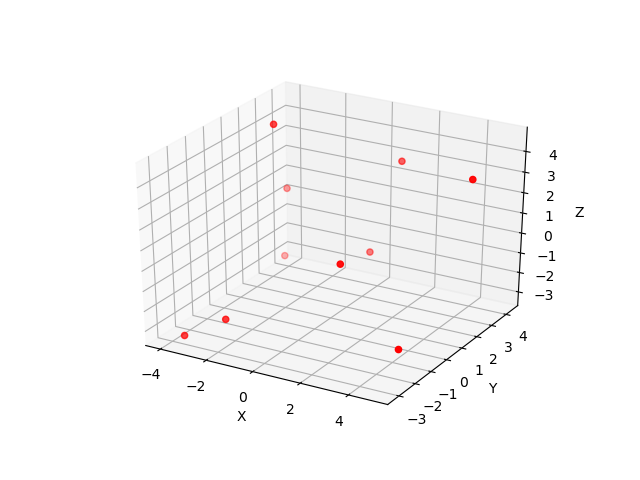

array([[ 4.94734622, -2.00673972, -3.99471386, -3.61715389, -3.2214884 ,
         1.79689659, -3.33630003,  4.92115216,  0.8041398 ,  0.26761051],
       [ 2.3764273 , -2.50459178,  3.93555668,  3.2223247 ,  2.12820105,
        -0.99897068, -3.14420224, -2.04189124,  4.27573361,  3.0892178 ],
       [ 3.6812499 , -2.33264142,  0.38568697, -2.63835252,  4.58866277,
         0.57589599, -3.14782218, -2.17878202,  2.69185554, -1.3927344 ]])

In [4]:
scatter_r3(10, -5, 5)

## Operations that will be used in camera class
### Functions include:
* Project to 2D
* Access to camera parameters

<IPython.core.display.Javascript object>


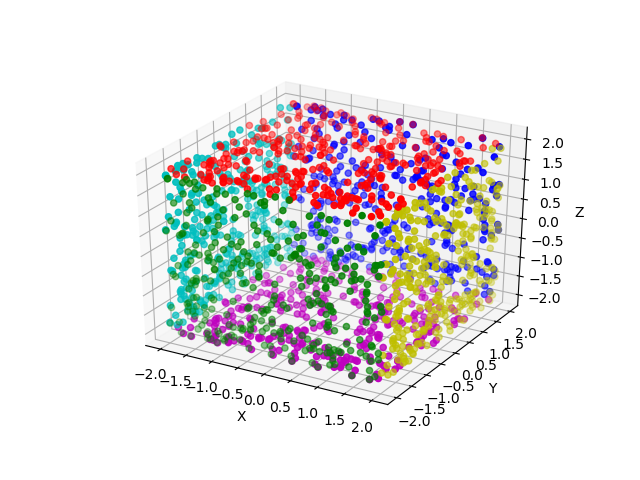

In [5]:
# Scatter an actually meaningful cube
n = 300
random_face = np.random.uniform(-2,2,(2,n))
s1 = np.r_[-2*np.ones((1,n)),random_face]
s2 = np.r_[2*np.ones((1,n)),random_face]
s3 = np.r_[random_face,-2*np.ones((1,n))]
s4 = np.r_[random_face,2*np.ones((1,n))]
s5 = np.r_[random_face[0,:],-2*np.ones(n),random_face[1,:]].reshape((3,n))
s6 = np.r_[random_face[0,:],2*np.ones(n),random_face[1,:]].reshape((3,n))
X = np.c_[s1,s2,s3,s4,s5,s6]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(s1[0,:],s1[1,:],s1[2,:],c='c')
ax.scatter(s2[0,:],s2[1,:],s2[2,:],c='y')
ax.scatter(s3[0,:],s3[1,:],s3[2,:],c='m')
ax.scatter(s4[0,:],s4[1,:],s4[2,:],c='r')
ax.scatter(s5[0,:],s5[1,:],s5[2,:],c='g')
ax.scatter(s6[0,:],s6[1,:],s6[2,:],c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [6]:
def compute_view_matrix(position, target, up):
    '''
    Inputs: 
        position : 3D coordinates of the camera center in world coordinates
        target : 3D coordinates of the camera target in world coordinates
        up : vector specifying the up direction of the camera. should be orthogonal to (target-position)
    Outputs:
        P : 3 x 4 camera extrinsic matrix, a concatenation of rotation matrix and translation matrix
    '''
    L = target - position
    L = L / np.linalg.norm(L)
    s = np.cross(L, up)
    s = s / np.linalg.norm(s)
    u_prime = np.cross(s,L)
    R = np.r_[s,u_prime,-L].reshape((3,3))
    print(R)
    T = -R @ position
    P = np.c_[R,T]
    return P

In [7]:
def project(position,target,up,X):
    '''
    Given camera extrinsic details, and 3D points X, 
    return the homogenous coordinates of Y,
    which are projected into the camera plane.
    See compute_view_matrix() details
    '''
    P = compute_view_matrix(position,target,up)
    _,n = X.shape
    Y = P @ np.r_[X,np.ones((1,n))]
    Y /= Y[2,:]
    return Y

In [8]:
def scatter_projection(ax,n,X):
    # n : number of points per face
    # X : represents the cube
    s1 = X[:,:n]
    s2 = X[:,n:2*n]
    s3 = X[:,2*n:3*n]
    s4 = X[:,3*n:4*n]
    s5 = X[:,4*n:5*n]
    s6 = X[:,5*n:6*n]
    
    ax.scatter(s1[0,:],s1[1,:],c='c')
    ax.scatter(s2[0,:],s2[1,:],c='y')
    ax.scatter(s3[0,:],s3[1,:],c='m')
    ax.scatter(s4[0,:],s4[1,:],c='r')
    ax.scatter(s5[0,:],s5[1,:],c='g')
    ax.scatter(s6[0,:],s6[1,:],c='b')

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')

[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [-0. -1. -0.]]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [-0. -1. -0.]]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [-0. -1. -0.]]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [-0. -1. -0.]]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [-0. -1. -0.]]


<IPython.core.display.Javascript object>


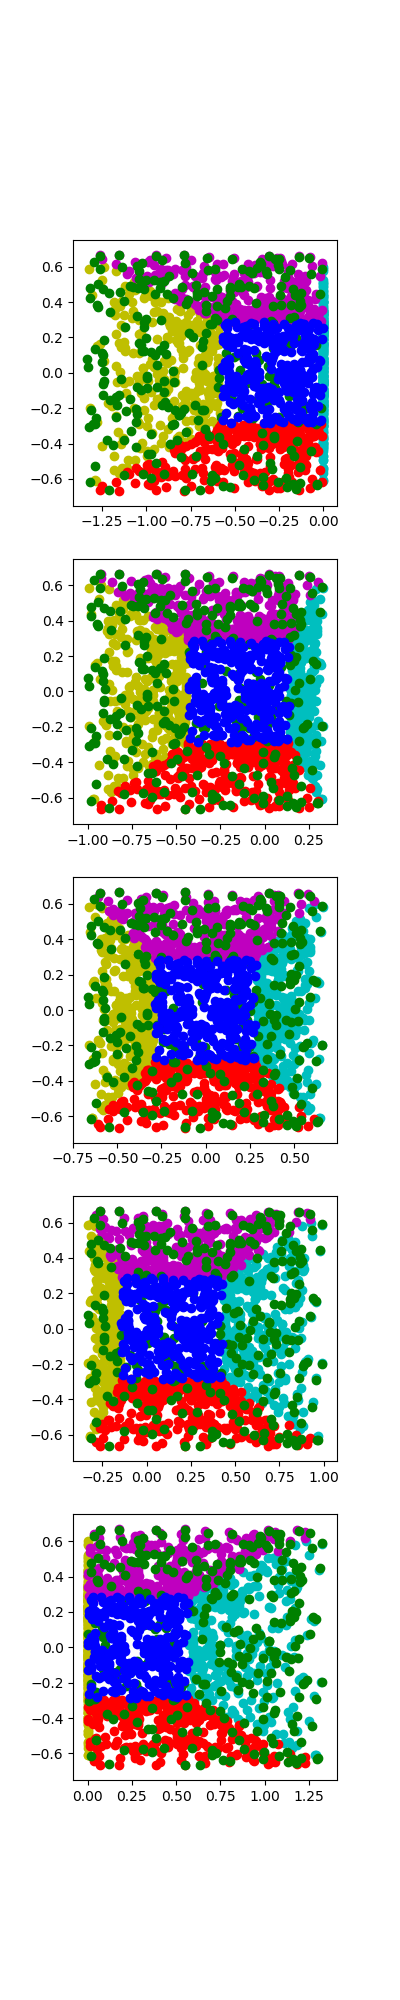

In [9]:
# Play with different cameras along a translational track only

Y1 = project(np.array([-2,-5,0]),np.array([-2,0,0]),np.array([0,0,1]),X)
Y2 = project(np.array([-1,-5,0]),np.array([-1,0,0]),np.array([0,0,1]),X)
Y3 = project(np.array([0,-5,0]),np.array([0,0,0]),np.array([0,0,1]),X)
Y4 = project(np.array([1,-5,0]),np.array([1,0,0]),np.array([0,0,1]),X)
Y5 = project(np.array([2,-5,0]),np.array([2,0,0]),np.array([0,0,1]),X)
fig = plt.figure(figsize=(4,20))
ax = fig.add_subplot(511,aspect='equal')
scatter_projection(ax,n,Y1)
ax = fig.add_subplot(512,aspect='equal')
scatter_projection(ax,n,Y2)
ax = fig.add_subplot(513,aspect='equal')
scatter_projection(ax,n,Y3)
ax = fig.add_subplot(514,aspect='equal')
scatter_projection(ax,n,Y4)
ax = fig.add_subplot(515,aspect='equal')
scatter_projection(ax,n,Y5)

[[ 1.          0.         -0.        ]
 [ 0.         -0.37139068  0.92847669]
 [-0.         -0.92847669 -0.37139068]]
[[ 1.          0.         -0.        ]
 [ 0.         -0.19611614  0.98058068]
 [-0.         -0.98058068 -0.19611614]]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [-0. -1. -0.]]
[[ 1.         -0.          0.        ]
 [ 0.          0.19611614  0.98058068]
 [-0.         -0.98058068  0.19611614]]
[[ 1.         -0.          0.        ]
 [ 0.          0.37139068  0.92847669]
 [-0.         -0.92847669  0.37139068]]


<IPython.core.display.Javascript object>


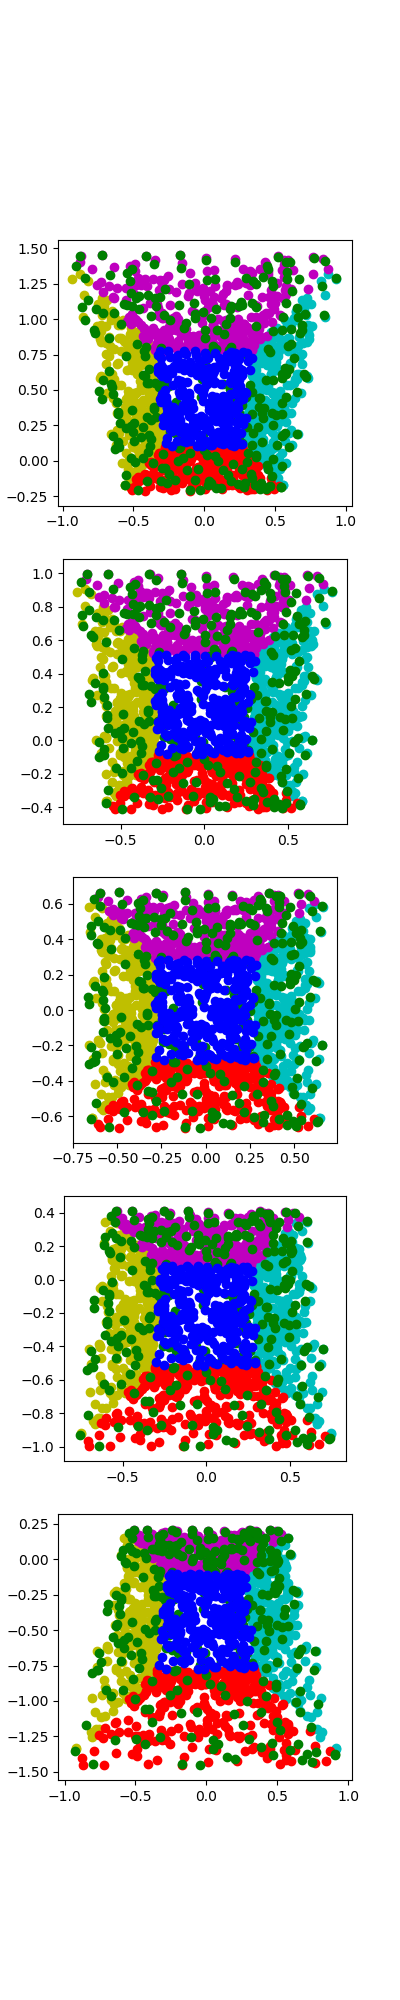

In [10]:
# Play with different cameras at the same point but looking up/down

Y1 = project(np.array([0,-5,0]),np.array([0,0,2]),np.array([0,-2,5]),X)
Y2 = project(np.array([0,-5,0]),np.array([0,0,1]),np.array([0,-1,5]),X)
Y3 = project(np.array([0,-5,0]),np.array([0,0,0]),np.array([0,0,1]),X)
Y4 = project(np.array([0,-5,0]),np.array([0,0,-1]),np.array([0,1,5]),X)
Y5 = project(np.array([0,-5,0]),np.array([0,0,-2]),np.array([0,2,5]),X)
fig = plt.figure(figsize=(4,20))
ax = fig.add_subplot(511,aspect='equal')
scatter_projection(ax,n,Y1)
ax = fig.add_subplot(512,aspect='equal')
scatter_projection(ax,n,Y2)
ax = fig.add_subplot(513,aspect='equal')
scatter_projection(ax,n,Y3)
ax = fig.add_subplot(514,aspect='equal')
scatter_projection(ax,n,Y4)
ax = fig.add_subplot(515,aspect='equal')
scatter_projection(ax,n,Y5)

In [23]:
def triangulate(y1,y2,P1,P2):
    '''
    y1 : 2D left camera points
    y2 : 2D right camera points
    X : world points
    '''
    _,n = y1.shape # n is number of matches
    X = np.zeros((4,n))
    for i in range(n):
        u1 = y1[0,i]
        v1 = y1[1,i]
        cm1 = np.zeros((3,3))
        cm1[0,1] = -1
        cm1[0,2] = v1
        cm1[1,0] = 1
        cm1[1,2] = -u1
        cm1[2,0] = -v1
        cm1[2,1] = u1
        
        u2 = y2[0,i]
        v2 = y2[1,i]
        cm2 = np.zeros((3,3))
        cm2[0,1] = -1
        cm2[0,2] = v2
        cm2[1,0] = 1
        cm2[1,2] = -u2
        cm2[2,0] = -v2
        cm2[2,1] = u2
        
        tmp_1 = cm1 @ P1
        tmp_2 = cm2 @ P2
        A = np.r_[tmp_1[:2,:], tmp_2[:2,:]]
        U,S,Vh = scipy.linalg.svd(A)
        X[:,i] = Vh[-1]
        X[:,i] /= X[3,i]
        
    return X

In [27]:
target=scatter_r3(lb=-3,ub=3,n=10,plot=False)

pos_1 = np.array([-5,-5,0])
up_1 = np.array([0,0,1])
tgt_1 = np.array([0,0,0])
P1 = compute_view_matrix(pos_1,tgt_1,up_1)
Y1 = project(pos_1,tgt_1,up_1,target)

pos_2 = np.array([-5,5,1])
up_2 = np.array([0,-1,5])
tgt_2 = np.array([0,0,0])
P2 = compute_view_matrix(pos_2,tgt_2,up_2)
Y2 = project(pos_2,tgt_2,up_2,target)

target_bp = triangulate(Y1,Y2,P1,P2)


<IPython.core.display.Javascript object>


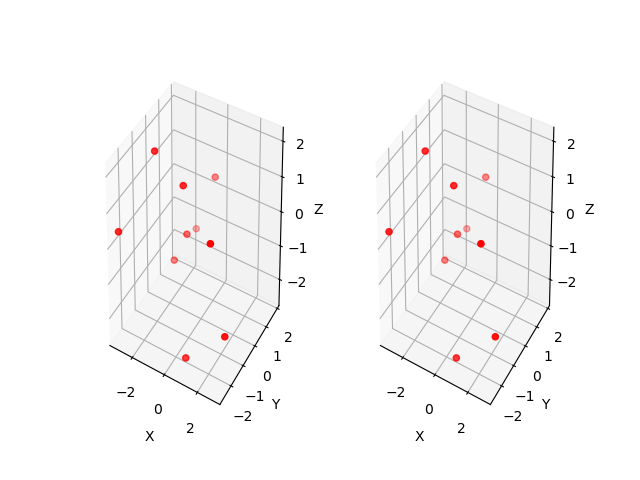

In [28]:
fig = plt.figure()
ax = fig.add_subplot(121,projection='3d')
ax.scatter(target[0,:],target[1,:],target[2,:],c = 'r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(122,projection='3d')
ax.scatter(target_bp[0,:],target_bp[1,:],target_bp[2,:],c = 'r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()